## Loading geometries, cubes and horizons

In [1]:
# Necessary imports
%load_ext autoreload
%autoreload 2

import sys
import warnings

import numpy as np

sys.path.append('..')
from seismiqb.batchflow import Pipeline, FilesIndex
from seismiqb import SeismicCropBatch, SeismicGeometry, SeismicCubeset, Horizon
from seismiqb import plot_image

warnings.filterwarnings("ignore")

In [2]:
paths_cubes = ['/notebooks/making_dvc/seismic_data/seismiqb/CUBE_3/P_cube_working.hdf5']

dsi = FilesIndex(path=paths_cubes, no_ext=True)
ds = SeismicCubeset(dsi)

In [3]:
ds = ds.load(collect_stats=True)

##  Testing `plot`-methods of `cubeset`

* `show_slide`

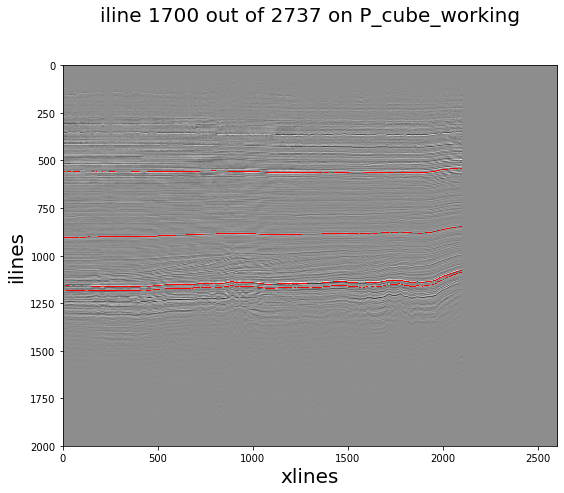

In [4]:
ds.show_slide(idx=0, n_line=1700, mode='iline', backend='matplotlib')

* we can also change orientation, make the pic larger and save it

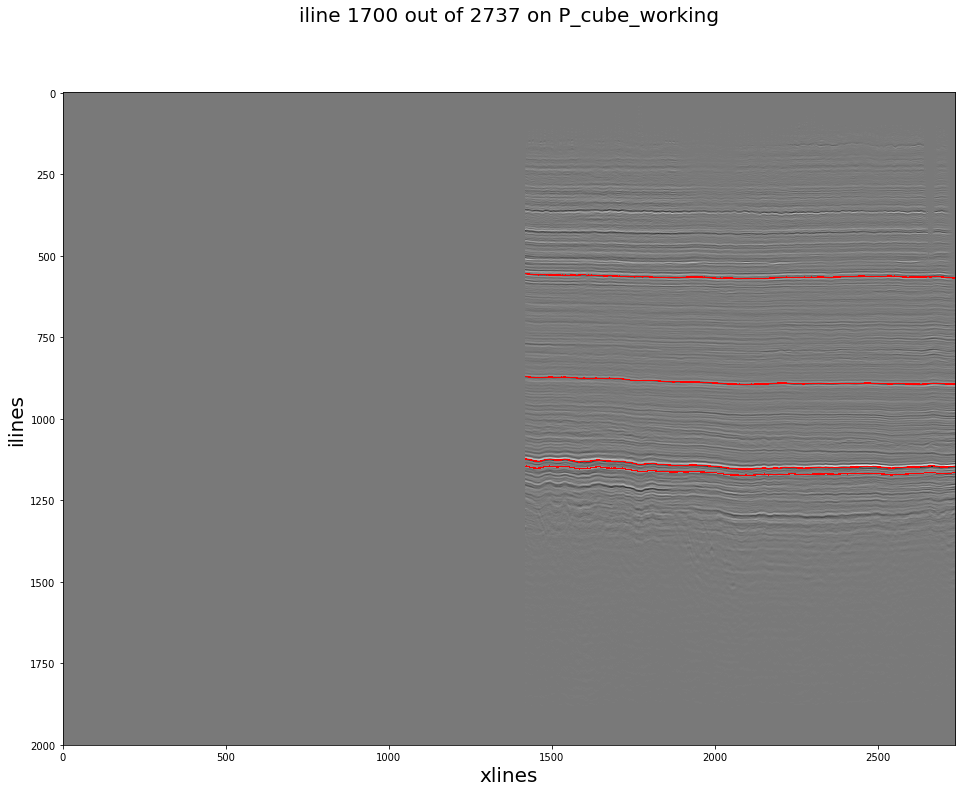

In [5]:
ds.show_slide(idx=0, n_line=1700, mode='xline', backend='matplotlib', figsize=(20, 12), order_axes=(0, 1),
              savepath='test_xline.png')

##  Testing `plot`-methods of `Horizon`

In [6]:
hor = Horizon('/notebooks/making_dvc/seismic_data/seismiqb/CUBE_3/BEST_HORIZONS/prb_B_anon',
              ds.geometries['P_cube_working'])

* let's first look at a slice of the cube containing the horizon

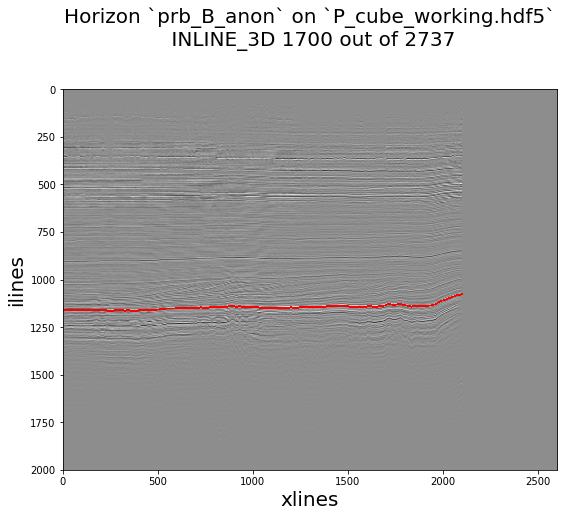

In [7]:
hor.show_slide(width=10, loc=1700)

* check out also the depth-map of the horizon controlling the font of the labels

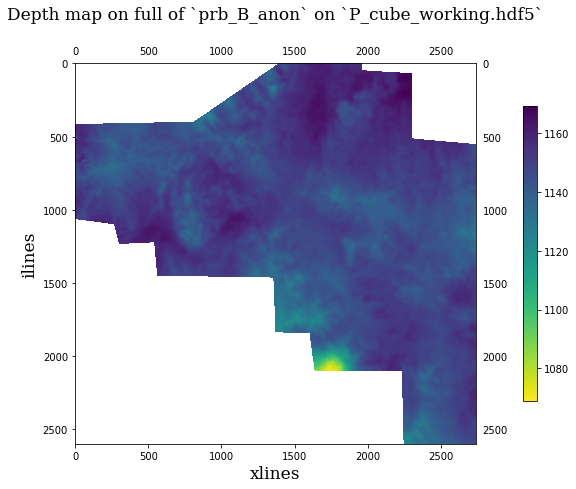

In [8]:
hor.show(backend='matplotlib', family='serif', fontsize=17)

* change backend and render small part of the same horizon

In [9]:
# hor.show(backend='plotly', slice=(slice(500, 1000), slice(500, 1000)),
#          max_size=700)

* let's also look at RGB-view of three adjacent horizon-levels

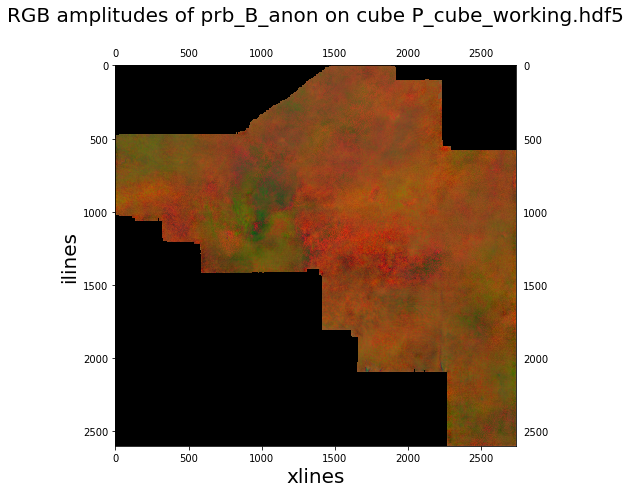

In [10]:
hor.show_amplitudes_rgb(backend='matplotlib')

## Other: `Geometry`, `Batch` and loss-plotting

* fetch `geometry` and check out the distribution of values

In [11]:
geom = ds.geometries[ds.indices[0]]

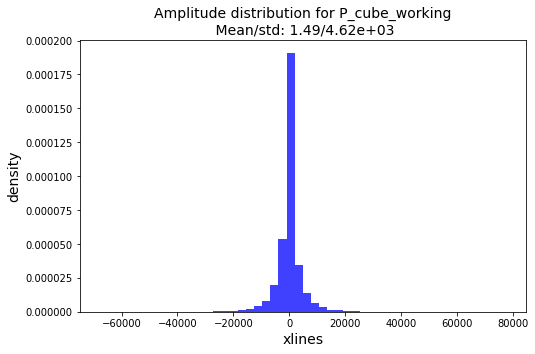

In [12]:
geom.show_amplitude_hist(fontsize=14)

* another way to plot cube-slice

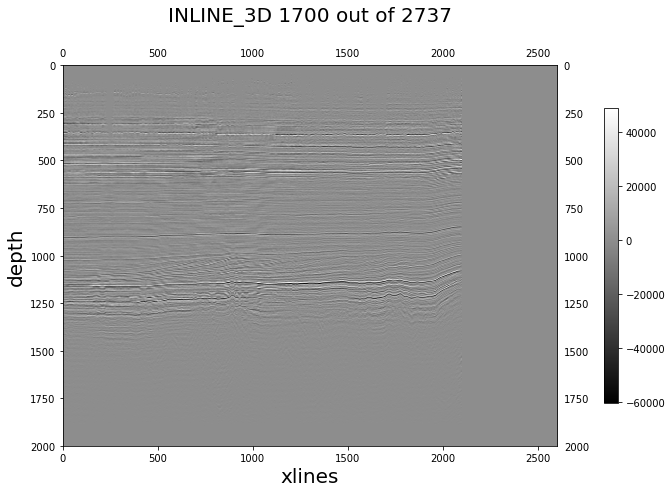

In [13]:
geom.show_slide(loc=1700, cmap='gray')

* let's make a small crop and check out its components

In [14]:
batch = (ds >> (Pipeline()
               .crop(points=D('sampler').sample(4), shape=(1, 256, 256))
               .load_cubes(dst='images')
               .create_masks(dst='masks'))
               .apply_transform(np.squeeze, src='images', dst='images')
               .apply_transform(np.squeeze, src='masks', dst='masks')).next_batch(1)

In [1]:
# batch.plot_components('images', 'masks', plot_mode='separate', backend='plotly')

* check out also how curve-plotting mode of `matplotlib`-backend can be used to plot loss-curves

In [17]:
n_points = 20
data = 5 * np.linspace(0, 2, n_points) + 2 + 0.5 * np.random.rand(n_points)

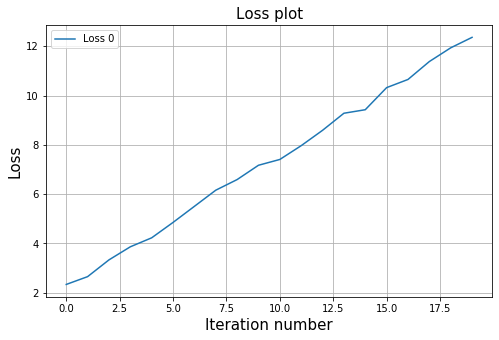

In [19]:
plot_image(data, mode='curve', fontsize=15, figsize=(8, 5))